 # Modeling the swelling behavior of a hypromellulose-based pharmaceutical formulation


In [1]:
import numpy as np
from numpy import array
from diffusionpy import Diffusion_MS
import matplotlib.pyplot as plt

We import the experimental data from https://doi.org/10.1016/s0168-3659(99)00104-2 

In [2]:

swelling_data=array([[0.       ,    0.    ],
       [  9.24861,   0.895  ],
       [ 11.18739,   1.08754],
       [ 16.86526,   1.2824 ],
       [ 32.37552,   1.54222],
       [ 63.25758,   2.15696],
       [121.14411,   2.80418],
       [152.02616,   3.06168],
       [182.76973,   3.28902],
       [211.713  ,   3.51403],
       [242.59505,   3.8388 ],
       [271.53832,   4.00119],
       [302.42037,   4.25869],
       [333.30242,   4.38859],
       [360.3069 ,   4.61593],
       [420.13222,   5.06829],
       [451.01427,   5.13324],
       [483.83511,   5.35826]])

minutes_exp=swelling_data[:,0]
thickness_millis=swelling_data[:,1]
wv0=0.01
wv8=0.99
dl0=0.4

def limits(dl0,wv0,wv8):
       wi0=np.asarray([(1-wv0)*(1-dl0),(1-wv0)*dl0,wv0])
       wi8=np.asarray([(1-wv8)*(1-dl0),(1-wv8)*dl0,wv8])
       return wi0,wi8


We wan to model this particular behavior

 We want to describe the water sorption and dissolution of this formulation. The formulation consists of three components: the hypromellulose (hpmc) which is the polymer, the buflomedil pyridoxal phosphate (bpp) as an API and water. First we define starting and equilibrium weight fractions.

In [3]:
nc=3
L=6/1000
Dvec=np.asarray([8E-9,8E-9,8E-9])
Mi=np.asarray([86000,554.5,18.015])
nt=300
t=np.linspace(0,minutes_exp[-1],nt)*60
mobile=np.asarray([False,False,True])
EJ=np.asarray([3E8])
etaJ=np.asarray([5.5E12])
exponent=np.asarray([0.])


 We can determine the mass dissolved in the dissolution medium by quantifying the mass that leaves the ASD. The initial mass of the ASD and the mass of the dissolution medium must be known

 We plot the results

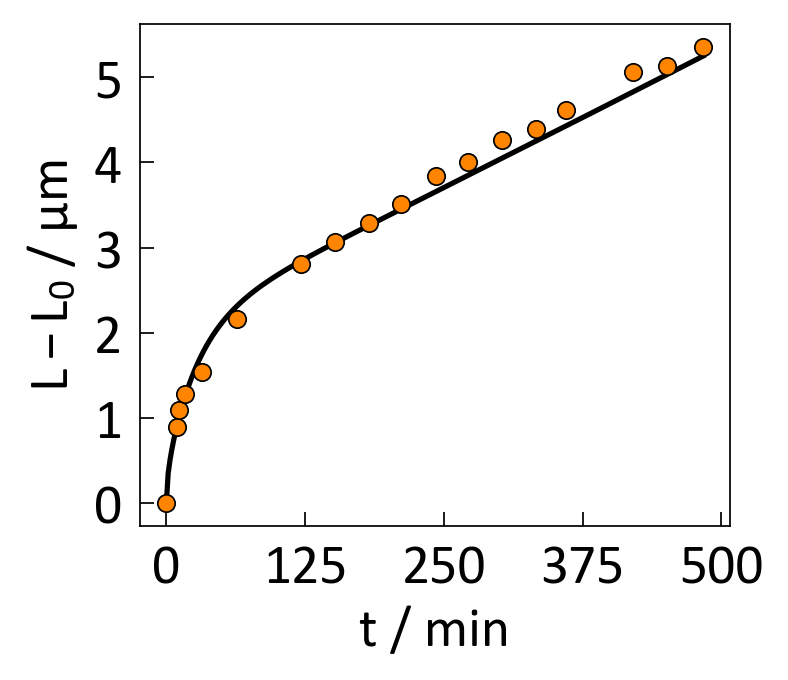

In [4]:

fig, ax = plt.subplots()
ax.set_xlabel("t / min")
ax.set_ylabel("$L-L_0$ / µm")
ax.set_xticks([0,125,250,375,500])
ax.set_yticks([0,1.,2.,3.,4.,5.,6.])
wi0,wi8=limits(dl0,wv0,wv8)
wt,wtz,zvec,Lt,sigma=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,EJ=EJ,etaJ=etaJ,exponent=exponent)
ax.plot(t/60,(Lt-L)*1000, 'k-') 
ax.plot(minutes_exp,thickness_millis, "C3o")


Which describes the swelling behavior of this ASD 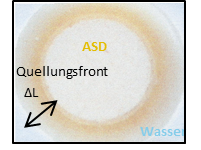